# History match the freyberg model using ``K`` parameter zones

In [7]:
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyemu
import platform
import pestools as pt
if 'window' in platform.platform().lower():
    ppp = 'pest++'
else:
    ppp = './pestpp'

In [8]:
base_dir = os.path.join("..","..","models","Freyberg","Freyberg_zones")
assert os.path.exists(base_dir)
[shutil.copy2(os.path.join(base_dir,f),f) for f in os.listdir(base_dir)];

# Let's set up a model using multiple zones for Hydraulic Conductivity

We have an interpretation of zonation, say from a geologic lithology map.

In [9]:
inzones = np.loadtxt('hk.zones')

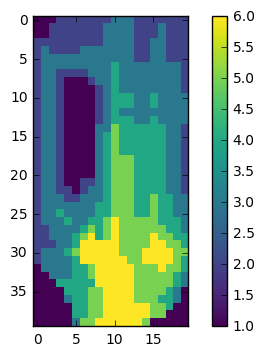

In [10]:
plt.imshow(inzones,interpolation='nearest',cmap='viridis')
plt.colorbar()

In [11]:
# see what the unique values are
np.unique(inzones)

array([ 1.,  2.,  3.,  4.,  5.,  6.])

## Look at `hk.zones` in a text editor
How can we make a template file to handle this?

In [13]:
pyemu.utils.start_slaves(base_dir,"{0}".format(ppp),"freyberg_zones.pst",20,slave_root='.',port=4004,master_dir='.')


Let's explore the results

In [14]:
df_obj = pd.read_csv("freyberg_zones.iobj",index_col=0)
df_obj

,model_runs_completed,total_phi,measurement_phi,regularization_phi,flux_fore,travel_fore,head_cal,flux_cal,head_fore
iteration,,,,,,,,,
0,0,62.31380,62.31380,0,0,0,57.95480,4.359080,0
1,15,10.88570,10.88570,0,0,0,10.80850,0.077223,0
2,29,9.66242,9.66242,0,0,0,9.66235,0.000066,0
3,43,9.65515,9.65515,0,0,0,9.65453,0.000625,0
4,65,9.65305,9.65305,0,0,0,9.65246,0.000583,0


In [15]:
res = pt.Res('freyberg_zones.rei')

In [16]:
res.describe_groups('head_cal')

,Group summary
n,13
Range,3.59365
Max,2.27696
Min,-1.31669
Mean,0.0843231
Standard deviation,0.892563
Varience,0.796669
25%,-0.42404
50%,-0.02686
75%,0.4067


In [17]:
res.describe_groups('flux_cal')

,Group summary
n,1.000000
Range,0.000000
Max,2.415000
Min,2.415000
Mean,2.415000
Standard deviation,NaN
Varience,NaN
25%,2.415000
50%,2.415000
75%,2.415000


(<matplotlib.figure.Figure at 0x11af649b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11af77518>)

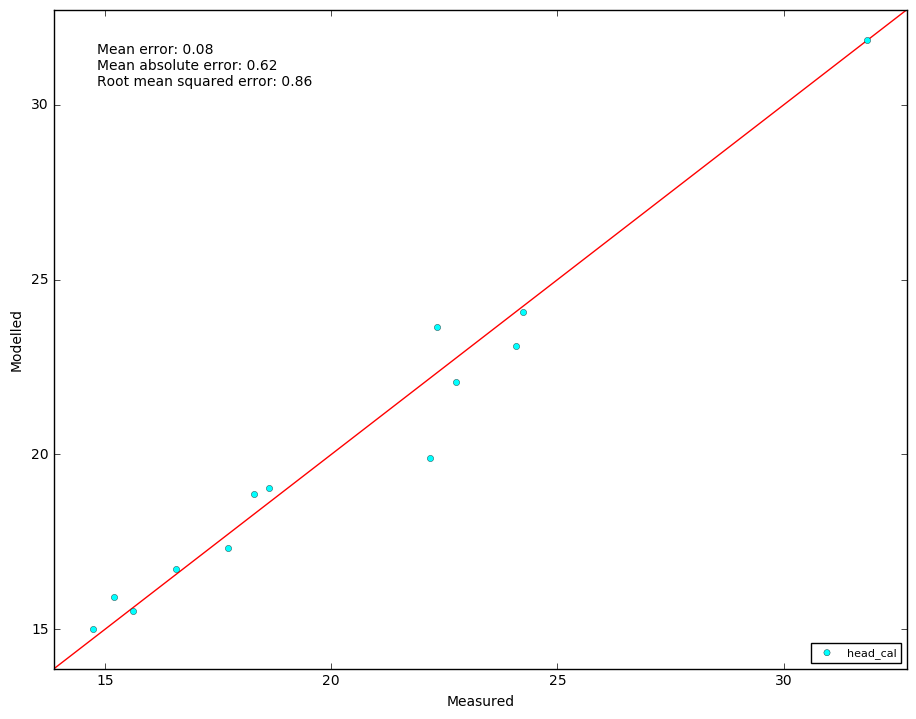

In [18]:
res.plot_one2one('head_cal',print_stats=['Mean', 'MAE', 'RMSE'])

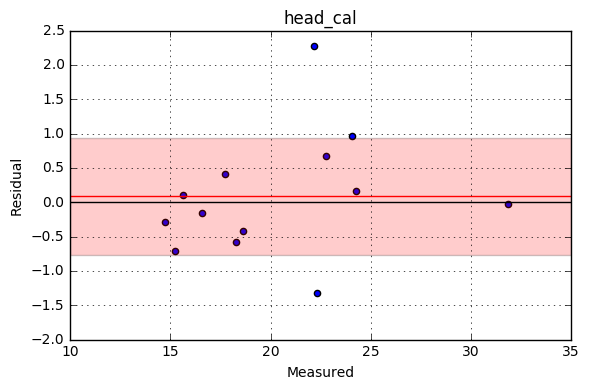

In [19]:
res.plot_measured_vs_residual('head_cal')

In [20]:
df_paru = pd.read_csv("freyberg_zones.par.usum.csv")
df_paru

,name,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
0,RCH1,-3.85943,0.073176,-4.00578,-3.71307,-3.850170,0.004126,-3.858420,-3.841920
1,HK1,0.90309,0.451545,0.00000,1.80618,0.240612,0.451491,-0.662370,1.143590
2,HK2,0.90309,0.451545,0.00000,1.80618,0.836830,0.182001,0.472828,1.200830
3,HK3,0.90309,0.451545,0.00000,1.80618,0.628383,0.124100,0.380182,0.876583
4,HK4,0.90309,0.451545,0.00000,1.80618,1.678480,0.347096,0.984293,2.372680
5,HK5,0.90309,0.451545,0.00000,1.80618,0.141782,0.153773,-0.165763,0.449327
6,HK6,0.90309,0.451545,0.00000,1.80618,0.674149,0.287818,0.098513,1.249790


In [21]:
df_predu = pd.read_csv("freyberg_zones.pred.usum.csv",index_col=0)
df_predu

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
FR03C16,19.6124,0.473822,18.6648,20.5601,19.8242,0.086394,19.6514,19.9970
FR04C9,22.3109,3.319190,15.6725,28.9493,23.3901,0.553070,22.2840,24.4963
RIVFLUX_FORE,-2811.0500,576.997000,-3965.0500,-1657.0600,-2639.9700,57.014200,-2754.0000,-2525.9400
TRAVEL_TIME,16856.9000,51189.100000,-85521.3000,119235.0000,60927.5000,14944.100000,31039.2000,90815.8000


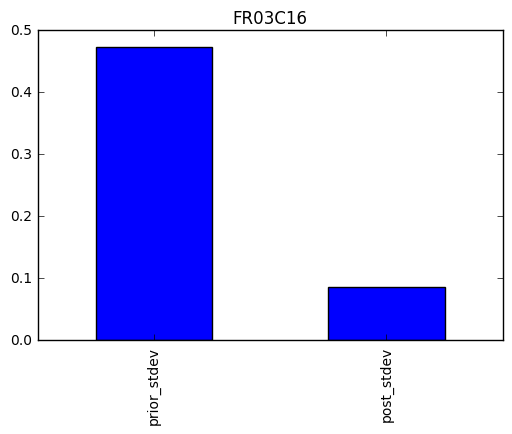

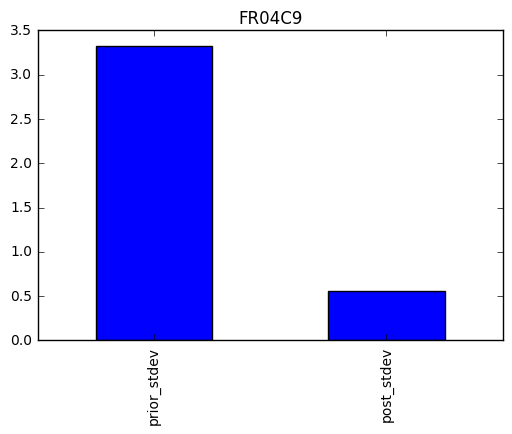

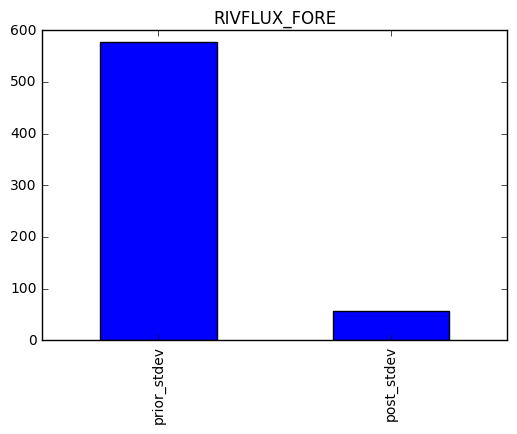

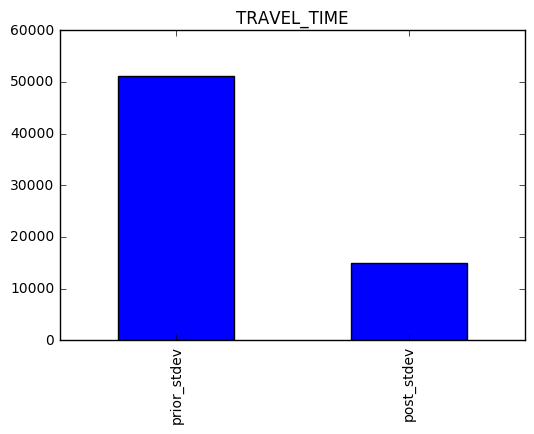

In [22]:
for forecast in df_predu.index:
    ax = df_predu.loc[forecast,["prior_stdev","post_stdev"]].plot(kind="bar")
    ax.set_title(forecast)
    plt.show()